In [1]:
import numpy as np
from matplotlib import pyplot as plt

# importa biblioteca do Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.datasets import cifar10, cifar100
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
# Importando DataSets
(X_train10, Y_train10), (X_test10, Y_test10) = cifar10.load_data()
(X_train100, Y_train100), (X_test100, Y_test100) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


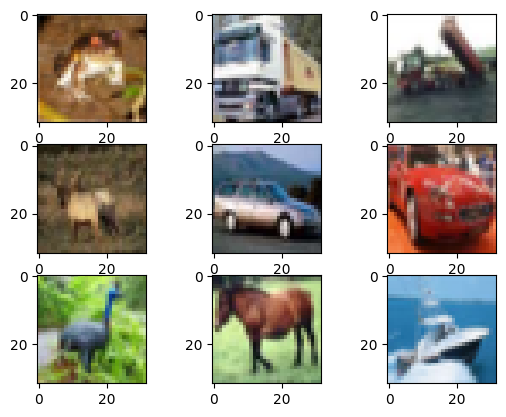

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]]


In [3]:
# Primeiras 9 imagens
for i in range(9):
  # Prepara para serem exibidas
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train10[i])

plt.show()

# Imprime classes das imagens
print(Y_train10[0:9])

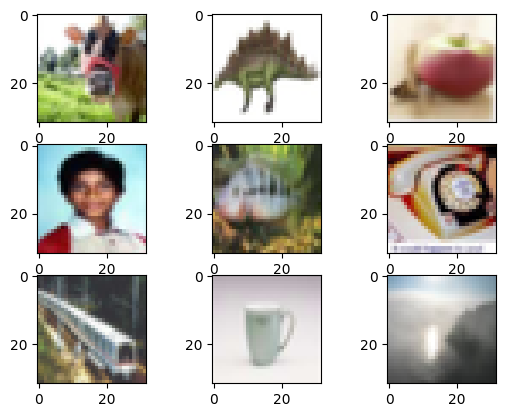

[[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]]


In [4]:
# Primeiras 9 imagens
for i in range(9):
  # Prepara para serem exibidas
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train100[i])

plt.show()

# Imprime classes das imagens
print(Y_train100[0:9])

In [5]:
# Implementando rede similar a AlexNet
alexnet = Sequential()

# Camada 1
# Camada convolucional
alexnet.add(Conv2D(96, (3, 3), strides=(4, 4), input_shape=(32, 32, 3), padding='same'))
alexnet.add(Activation('relu'))
# Camada de pooling
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Camada 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(Activation('relu'))
# Camada de pooling
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Camada 3
alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(Activation('relu'))

# Camada 4
alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(Activation('relu'))

# Camada 5
alexnet.add(Conv2D(256, (3, 3), padding='same'))
alexnet.add(Activation('relu'))
# Camada de pooling
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Fazendo vetor de varias dimensões se tornar um vetor de uma dimensão - achatamento dos pixels
alexnet.add(Flatten())

# Camada 6
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))

# Camada 7
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))

# Camada 8
alexnet.add(Dense(10))
alexnet.add(Activation('softmax'))

In [6]:
# Compila o modelo
alexnet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
alexnet.summary()

# Treina o modelo
alexnet.fit(X_train10 / 255.0, to_categorical(Y_train10), batch_size=128, shuffle=True, epochs=10, validation_data=(X_test10 / 255.0, to_categorical(Y_test10)))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          2688      
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 4, 4, 256)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                    

In [7]:
# Implementando rede similar a AlexNet
alexnet = Sequential()

# Camada 1
# Camada convolucional
alexnet.add(Conv2D(96, (3, 3), strides=(4, 4), input_shape=(32, 32, 3), padding='same'))
alexnet.add(Activation('relu'))
# Camada de pooling
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Camada 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(Activation('relu'))
# Camada de pooling
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Camada 3
alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(Activation('relu'))

# Camada 4
alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(Activation('relu'))

# Camada 5
alexnet.add(Conv2D(256, (3, 3), padding='same'))
alexnet.add(Activation('relu'))
# Camada de pooling
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Fazendo vetor de varias dimensões se tornar um vetor de uma dimensão - achatamento dos pixels
alexnet.add(Flatten())

# Camada 6
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))

# Camada 7
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))

# Camada 8
alexnet.add(Dense(100))
alexnet.add(Activation('softmax'))

In [9]:
# Compila o modelo
alexnet.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
alexnet.summary()

# Treina o modelo
alexnet.fit(X_train100 / 255.0, to_categorical(Y_train100), batch_size=128, shuffle=True, epochs=20, validation_data=(X_test100 / 255.0, to_categorical(Y_test100)))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          2688      
                                                                 
 activation_8 (Activation)   (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_9 (Activation)   (None, 4, 4, 256)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                  